# Algorithms Homework 4

Assigment Overview: This assignment implements a basic interior point method for nonlinear programs with equality constraints and bounds.

## Tips and Tricks

### Background

Recall, the step for a primal-dual interior point method is defined by the following system of linear equations (Eq. 6.56 in Biegler, 2010):

\begin{equation*}
\begin{bmatrix}
W^k & \nabla c(x^k)^T & -I \\
\nabla c(x^k) & 0 & 0 \\
U^k & 0 & X^k
\end{bmatrix}
\begin{bmatrix}
d_x^k \\
d_v^k \\
d_u^k
\end{bmatrix}
=
-\begin{bmatrix}
\nabla f(x^k) + \nabla c(x^k) v^k - u^k \\
c(x^k) \\
X^k u^k - \mu_l e
\end{bmatrix}.
\end{equation*}

Alternatively, the step for the dual variables for the bounds can be recommed for this system (Eq. 6.57 in Biegler, 2010):

\begin{equation*}
\begin{bmatrix}
W^k + \Sigma^k & \nabla c(x^k)^T \\
\nabla c(x^k) & 0
\end{bmatrix}
\begin{bmatrix}
d_x^k \\
d_v^k
\end{bmatrix}
=
-\begin{bmatrix}
\nabla \varphi_\mu(x^k) + \nabla c(x^k) v^k \\
c(x^k)
\end{bmatrix}.
\end{equation*}

And then computed using the solution to the linear system (Eq. 6.58 in Biegler, 2010):

\begin{equation*}
d_u^k = \mu_l (X^k)^{-1} e - u^k - \Sigma^k d_x^k.
\end{equation*}

Finally, inertia correction and regularization can be applied to ensure reliable calculation of the Newton step (Eq. 6.59 in Biegler, 2010):

\begin{equation*}
\begin{bmatrix}
W^k + \Sigma^k + \delta_W I & \nabla c(x^k)^T \\
\nabla c(x^k) & -\delta_A I
\end{bmatrix}
\begin{bmatrix}
d_x^k \\
d_v^k
\end{bmatrix}
=
-\begin{bmatrix}
\nabla \varphi_\mu(x^k) + \nabla c(x^k) v^k \\
c(x^k)
\end{bmatrix}.
\end{equation*}

### Problem Formulation

Consider the following nonlinear program:

\begin{align*}
	\min_{x} \quad & f(x) \\
	\mathrm{s.t.} \quad & c(x) = 0 \\
	& x_i \geq 0, \quad i \in \mathcal{I}
\end{align*}

where $x \in \mathbb{R}^{n}$, $f(x): \mathbb{R}^{n} \rightarrow \mathbb{R}$, $c(x): \mathbb{R}^{n} \rightarrow \mathbb{R}^{m}$ and $|\mathcal{I} |$ = $r$ (i.e., there are $r$ variables with a lower bound and $r \leq n$). This is an extension of (6.48) in Biegler (2010).

This has the corresponding log-barrier approximation:

\begin{align*}
	\min_{x} \quad & \phi_{\mu_l}(x) := f(x) - \mu_l \sum_{i \in \mathcal{I}} \log(x_i) \\
	\mathrm{s.t.} \quad & c(x) = 0
\end{align*}

which is an extension of (6.49) in Biegler (2010).

Let the $n \times r$ matrix $G$ encode which variables are bounded. If variable $i$ corresponds to the $j$th bound, then $G_{i,j} = 1$ and otherwise $G_{i,j} = 0$.

$G$ is assembled as follows:
1. Initialize $G$ as the zero matrix
2. Loop over $k=1$ to $k=|\mathcal{I}$
   1. Extract the index $i$ corresponding to the element $\mathcal{I}_k$
   2. Set $G_{i,k} = 1$

Notice that $G$ is the gradient of $x \geq 0$. $G^T G = I$ but the converse does not hold unless $r = n$.

### Reformulation Example

Start with:


\begin{align*}
	\min_{x} \quad & x_1^2 + x_2 \\
	\mathrm{s.t.} \quad & x_1 + x_2 = 1 \\
	& x_1 + 1 \geq 0
\end{align*}

Add slack variable $x_3$ and convert the inequality constraint to an equality constraint and bound:


\begin{align*}
	\min_{x} \quad & x_1^2 + x_2 \\
	\mathrm{s.t.} \quad & x_1 + x_2 = 1 \\
	& x_1 + 1 - x_3 = 0 \\
	& x_3 \geq 0
\end{align*}


Now assemble $G$:

\begin{equation*}
	G = \begin{bmatrix}
		0 \\
		0 \\
		1
	\end{bmatrix}
\end{equation*}

### Primal Dual Optimality Conditions

$$
\newcommand{\dims}[3]{\underbrace{#1}_{#2 \times #3}}
\newcommand{\I}[0]{\mathcal{I}}
\newcommand{\dfx}[0]{\dims{\nabla f(x^k)}{n}{1}}
\newcommand{\cx}[0]{\dims{c(x^k)}{m}{1}}
\newcommand{\dcx}[0]{\dims{\nabla c(x^k)}{n}{m}}
\newcommand{\dcxT}[0]{\dims{\nabla_x c(x^k)^T}{m}{n}}
\newcommand{\W}[0]{\dims{W^k}{n}{n}}
\newcommand{\G}[0]{\dims{G}{n}{r}}
\newcommand{\GT}[0]{\dims{G^T}{r}{n}}
\newcommand{\vk}[0]{\dims{v^k}{m}{1}}
\newcommand{\Xinv}[0]{\dims{(\hat{X}^k)^{-1}}{r}{r}}
\newcommand{\X}[0]{\dims{\hat{X}^k}{r}{r}}
\newcommand{\e}[0]{\dims{e}{r}{1}}
\newcommand{\uk}[0]{\dims{u^k}{r}{1}}
\newcommand{\dx}[0]{\dims{d_x^k}{n}{1}}
\newcommand{\dv}[0]{\dims{d_v^k}{m}{1}}
\newcommand{\du}[0]{\dims{d_u^k}{r}{1}}
\newcommand{\Uk}[0]{\dims{U^k}{r}{r}}
\newcommand{\Sk}[0]{\dims{\Sigma^k}{n}{n}}
\newcommand{\dphi}[0]{\dims{\nabla \phi_{\mu_l}}{n}{1}}
$$

Next we extend (6.51) in Biegler (2010):
    
\begin{gather*}
	\dfx ~+~ \dcx \vk ~-~ \G \uk = \dims{0}{n}{1} \\
	\X \uk = \mu \e \\
	\cx = \dims{0}{m}{1}
\end{gather*}

We now extend (6.56) in Biegler (2010):

\begin{equation*}
	\begin{bmatrix}
		\W & \dcx & \G \\
		\dcxT & \dims{0}{m}{m} & \dims{0}{m}{r} \\
		\Uk \GT & \dims{0}{r}{m} & \X
	\end{bmatrix} 
	\begin{bmatrix}
		\dx \\
		\dv \\
		\du
	\end{bmatrix} = -
	\begin{bmatrix}
	\dfx ~+~ \dcx \vk ~-~ \G \uk \\
	\cx \\
	\X \uk ~-~ \mu_l \e
	\end{bmatrix}
\end{equation*}

where $U^k = \mathrm{diag}\{u^k\}$ and $W^k = \nabla_{xx} L(x^k,v^k)$. Notice that $W^k$ does NOT include a contribution from the barrier term:

\begin{equation*}
	\W = \dims{\nabla^2 f(x^k)}{n}{n} + \sum_{j=1}^{m} \left( \dims{\nabla^2 c_{j}(x^k)}{n}{n} \underbrace{v^k_{j}}_{\mathrm{scalar}} \right)
\end{equation*}


We can verify that $W^k$ does not include $\hat{X}$ by showing that the KKT system above is a Newton step to solve the nonlinear system for the primal dual conditions.


The Newton step can be simplified, similar to (6.57) and (6.58) in Biegler (2010):

\begin{equation*}
	\begin{bmatrix}
		\W + \Sk & \dcx \\
		\dcxT & 0
	\end{bmatrix} 
	\begin{bmatrix}
		\dx \\
		\dv
	\end{bmatrix} = -
	\begin{bmatrix}
	\dphi ~+~ \dcx \vk \\
	\cx
	\end{bmatrix}
\end{equation*}


and


\begin{equation*}
	\du = \mu_l \Xinv \e ~-~ \uk ~-~ \GT \Sk \dx
\end{equation*}


where

\begin{equation*}
	\Sk = \G \Xinv \Uk \GT
\end{equation*}


and 


\begin{equation*}
	\dphi = \dfx - \mu_l \G \Xinv \dims{e}{r}{1}
\end{equation*}


Notice that the equation for $\du$ simplifies by substituting $G^T G = I$:

\begin{equation*}
	\du = \mu_l \Xinv \e ~-~ \uk ~-~ \Xinv \Uk \GT \dx
\end{equation*}

Finally, inertia correction can be applied to simplified KKT step similar to (6.59) in Biegler (2010).  

## Basic Interior Point Method for Inequality and Equality Constraint NLPs

Implement a basic interior point method for inequality and equality constrained nonlinear programs. See pg. 154 – 155 in Biegler (2010). You may skip the line search, i.e., always take a full step.

### Pseudocode

Write detailed pseudocode on paper or a whiteboard. Scan/take a photo and turn in.

### Python Implementation

Implement in Python. Hints: Reuse code from Algorithm 5.2 example.

In [1]:
### Load Python libraries

import sys
if "google.colab" in sys.modules:
    !wget "https://raw.githubusercontent.com/ndcbe/optimization/main/notebooks/helper.py"
    import helper
    # helper.easy_install() # We do NOT need Pyomo for this assignment
else:
    sys.path.insert(0, '../../../optimization/notebooks/')
    import helper
helper.set_plotting_style() # But we do want the nice plots

import numpy as np
from scipy import linalg



### Define helper functions
## Check is element of array is NaN
def check_nan(A):
    return np.sum(np.isnan(A))

## Calculate gradient with central finite difference
def my_grad_approx(x,f,eps1,verbose=False):
    '''
    Calculate gradient of function f using central difference formula
    
    Inputs:
        x - point for which to evaluate gradient
        f - function to consider
        eps1 - perturbation size
        
    Outputs:
        grad - gradient (vector)
    '''
    
    n = len(x)
    grad = np.zeros(n)
    
    if(verbose):
        print("***** my_grad_approx at x = ",x,"*****")
    
    for i in range(0,n):
        
        # Create vector of zeros except eps in position i
        e = np.zeros(n)
        e[i] = eps1
        
        # Finite difference formula
        my_f_plus = f(x + e)
        my_f_minus = f(x - e)
        
        # Diagnostics
        if(verbose):
            print("e[",i,"] = ",e)
            print("f(x + e[",i,"]) = ",my_f_plus)
            print("f(x - e[",i,"]) = ",my_f_minus)
        
        
        grad[i] = (my_f_plus - my_f_minus)/(2*eps1)
    
    if(verbose):
        print("***** Done. ***** \n")
    
    return grad

## Calculate gradient with central finite difference
def my_jac_approx(x,h,eps1,verbose=False):
    '''
    Calculate Jacobian of function h(x) using central difference formula
    
    Inputs:
        x - point for which to evaluate gradient
        h - vector-valued function to consider. h(x): R^n --> R^m
        eps1 - perturbation size
        
    Outputs:
        A - Jacobian (n x m matrix)
    '''
    
    # Check h(x) at x
    h_x0 = h(x)
    
    # Extract dimensions
    n = len(x)
    m = len(h_x0)
    
    # Initialize Jacobian matrix
    A = np.zeros((n,m))
    
    # Calculate Jacobian by row
    for i in range(0,n):
        
        # Create vector of zeros except eps in position i
        e = np.zeros(n)
        e[i] = eps1
        
        # Finite difference formula
        my_h_plus = h(x + e)
        my_h_minus = h(x - e)
        
        # Diagnostics
        if(verbose):
            print("e[",i,"] = ",e)
            print("h(x + e[",i,"]) = ",my_h_plus)
            print("h(x - e[",i,"]) = ",my_h_minus)
        
        
        A[i,:] = (my_h_plus - my_h_minus)/(2*eps1)
    
    if(verbose):
        print("***** Done. ***** \n")
    
    return A
    
## Calculate Hessian using central finite difference
def my_hes_approx(x,grad,eps2):
    '''
    Calculate gradient of function my_f using central difference formula and my_grad
    
    Inputs:
        x - point for which to evaluate gradient
        grad - function to calculate the gradient
        eps2 - perturbation size (for Hessian NOT gradient approximation)
        
    Outputs:
        H - Hessian (matrix)
    '''
    
    n = len(x)
    H = np.zeros([n,n])
    
    for i in range(0,n):
        # Create vector of zeros except eps in position i
        e = np.zeros(n)
        e[i] = eps2
        
        # Evaluate gradient twice
        grad_plus = grad(x + e)
        grad_minus = grad(x - e)
        
        # Notice we are building the Hessian by column (or row)
        H[:,i] = (grad_plus - grad_minus)/(2*eps2)

    return H

## Linear algebra calculation
def xxT(u):
    '''
    Calculates u*u.T to circumvent limitation with SciPy
    
    Arguments:
    u - numpy 1D array
    
    Returns:
    u*u.T
    
    Assume u is a nx1 vector.
    Recall: NumPy does not distinguish between row or column vectors
    
    u.dot(u) returns a scalar. This functon returns an nxn matrix.
    '''
    
    n = len(u)
    A = np.zeros([n,n])
    for i in range(0,n):
        for j in range(0,n):
            A[i,j] = u[i]*u[j]
    
    return A

## Analyze Hessian
def analyze_hes(B):
    print(B,"\n")
    
    l = linalg.eigvals(B)
    print("Eigenvalues: ",l,"\n")


In [2]:
## Assemble KKT matrix (equality constrained only)
def assemble_check_KKT(W,Sk,A,deltaA,deltaW,verbose):
    
    # Add your solution here
    
    return KKT,inertia_correct,pos_ev,neg_ev,zero_ev

In [3]:
def barrier_subproblem(x0,v0,u0,calc_f,calc_c,var_bounds,mu,eps,max_iter=100,verbose=False):
    '''
    Basic Full Space Newton Method for Solving Barrier Subproblem Constrained NLP
    
    Input:
        x0 - starting point (vector)
        calc_f - function to calculate objective (returns scalar)
        calc_c - function to calculate constraints (returns vector)
        var_bounds - list of indicies for variables with lower bound
        mu - barrier penalty
        eps - tolerance for termination
        
    Histories (stored for debugging):
        x - history of steps (primal variables)
        v - history of steps (duals for constraints)
        u - history of steps (duals for bounds)
        f - history of objective evaluations
        c - history of constraint evaluations
        df - history of objective gradients
        dL - history of Lagrange function gradients
        A - history of constraint Jacobians
        W - history of Lagrange Hessians
        S - history of sigma matrix
    
    Outputs:
        x - final value for primal variable
        v - final value for constraint duals
        u - final value for bound duals
    
    Notes:
        1. For simplicity, central finite difference is used 
           for all gradient calculations.
    '''    
    
    ### Specifics for Algorithm 5.2
    # Tuning parameters
    delta_bar_W_min = 1E-20
    delta_bar_W_0 = 1E-4
    delta_bar_W_max = 1E40
    delta_bar_A = 1E-8
    kappa_u = 8
    kappa_l = 1/3
    
    # Declare iteration histories as empty lists
    x = []
    v = []
    u = []
    f = []
    L = []
    c = []
    df = []
    dL = []
    A = []
    W = []

    # Add your solution here

In [4]:
def interior_point(x0,calc_f,calc_c,var_bounds,max_iter=20):
    
    
    # Add your solution here
    
    return x, v, u, mu, E

## Test Problems

### Problem 1: Convex

In [5]:
f = lambda x: x[0] + 2*x[1]
c = lambda x: (x[0] + x[1] - 1)*np.ones(1)

# Indices of variables with lower bound of zero
vb = [1]

x0 = np.ones(2)
u0 = np.ones(1)
v0 = np.ones(1)

x_, v_, u_, E_ = barrier_subproblem(x0,v0,u0,f,c,vb,1E-1,1E-10,verbose=False)

Iter. 	f(x) 		||c(x)|| 	E 		||dx|| 		||dv|| 		||du|| 		delta_A 	delta_W
0   	 3.0000e+00 	1.0000e+00 	 2.00e+00 	 9.06e-01 	 2.00e+00 	 3.56e-04 	 0.00e+00 	 0.00e+00
1   	 1.0996e+00 	1.3978e-10 	 3.20e-04 	 5.03e-04 	 1.78e-04 	 3.56e-04 	 0.00e+00 	 0.00e+00
2   	 1.1000e+00 	3.9524e-14 	 1.26e-07 	 1.70e-07 	 3.94e-08 	 5.91e-08 	 0.00e+00 	 0.00e+00
3   	 1.1000e+00 	0.0000e+00 	 6.87e-11 	 1.48e-11 	 1.11e-10 	 1.04e-10 	 0.00e+00 	 0.00e+00


### Problem 2: Convex

In [6]:
f = lambda x: x[0] + 2*x[1]
c = lambda x: (x[0] + x[1] - 1)*np.ones(1)

# Indices of variables with lower bound of zero
vb = [1]

x0 = np.ones(2)
#u0 = np.ones(1)
#v0 = np.ones(1)

# x_, v_, u_, E_ = barrier_subproblem(x0,v0,u0,f,c,vb,1E-1,1E-10,verbose=False)

x, v, u, mu, E = interior_point(x0,f,c,vb)


*** Barrier Subproblem  0  ***
mu =  10.0
Iter. 	f(x) 		||c(x)|| 	E 		||dx|| 		||dv|| 		||du|| 		delta_A 	delta_W
0   	 3.0000e+00 	1.0000e+00 	 9.00e+00 	 1.35e+01 	 2.00e+00 	 8.45e-03 	 0.00e+00 	 0.00e+00

*** Barrier Subproblem  1  ***
mu =  2.0
Iter. 	f(x) 		||c(x)|| 	E 		||dx|| 		||dv|| 		||du|| 		delta_A 	delta_W
0   	 1.1008e+01 	1.3978e-10 	 7.92e+00 	 1.14e+01 	 4.22e-03 	 8.45e-03 	 0.00e+00 	 0.00e+00

*** Barrier Subproblem  2  ***
mu =  0.4
Iter. 	f(x) 		||c(x)|| 	E 		||dx|| 		||dv|| 		||du|| 		delta_A 	delta_W
0   	 2.9318e+00 	0.0000e+00 	 1.53e+00 	 2.17e+00 	 1.70e-04 	 3.40e-04 	 0.00e+00 	 0.00e+00

*** Barrier Subproblem  3  ***
mu =  0.08000000000000002
Iter. 	f(x) 		||c(x)|| 	E 		||dx|| 		||dv|| 		||du|| 		delta_A 	delta_W
0   	 1.3993e+00 	2.5520e-10 	 3.19e-01 	 4.51e-01 	 1.70e-04 	 3.40e-04 	 0.00e+00 	 0.00e+00

*** Barrier Subproblem  4  ***
mu =  0.016000000000000004
Iter. 	f(x) 		||c(x)|| 	E 		||dx|| 		||dv|| 		||du|| 		delta_A 	delta_W
0   	 1.0801e+00

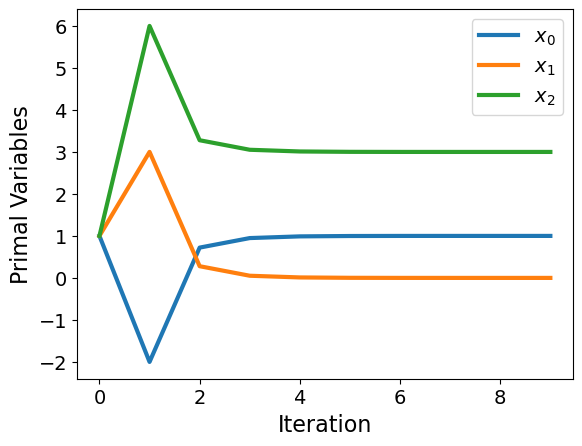

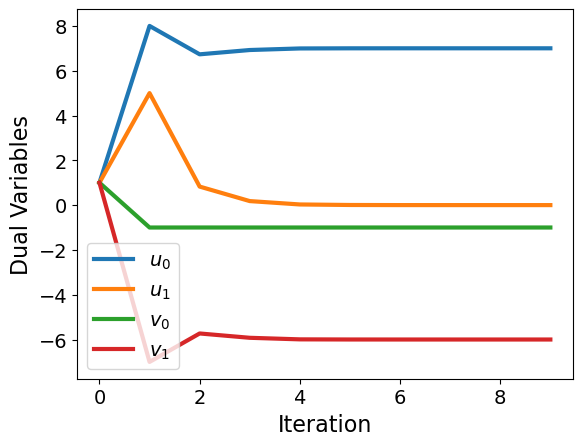

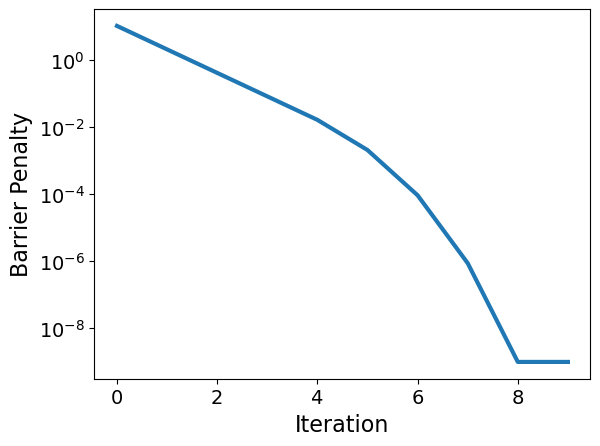

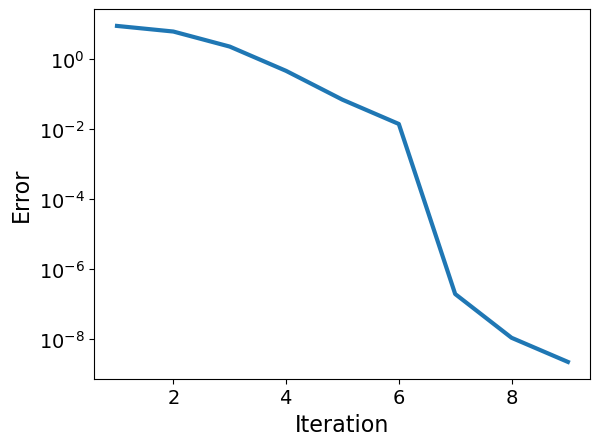

In [14]:
import matplotlib.pyplot as plt

def plot_results(x,u,v,mu,E):
    ''' Plot results of interior point method

    Inputs:
        x - primal variables
        u - dual variables for lower bounds
        v - dual variables for equality constraints
        mu - barrier penalty
        E - error

    Outputs:
        None

    Other:
        Plots are generated.
    '''

    # number of iterations
    N = len(x)

    # iteration
    iters = range(0,N)

    plt.figure
    for i in range(0,len(x0)):
        plt.plot(iters,[x[j][i] for j in range(0,N)],label="$x_{"+str(i)+"}$")
    plt.xlabel("Iteration")
    plt.ylabel("Primal Variables")
    plt.legend()
    plt.show()

    plt.figure
    for i in range(0,len(u[0])):
        plt.plot(iters,[u[j][i] for j in range(0,N)],label="$u_{"+str(i)+"}$")
    for i in range(0,len(v[0])):
        plt.plot(iters,[v[j][i] for j in range(0,N)],label="$v_{"+str(i)+"}$")
    plt.xlabel("Iteration")
    plt.ylabel("Dual Variables")
    plt.legend()
    plt.show()

    plt.figure
    plt.semilogy(iters,mu)
    plt.xlabel("Iteration")
    plt.ylabel("Barrier Penalty")
    plt.show()

    plt.figure
    plt.semilogy(range(1,N),E)
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    plt.show()

plot_results(x,u,v,mu,E)

### Problem 3: Nonconvex

In [8]:
f = lambda x: x[0] + 2*x[1] + x[2]**2

def c(x):
    rhs = np.zeros(2)
    rhs[0] = x[0] + x[1] - 1
    rhs[1] = x[2] - x[1] - 3
    return rhs

# Indices of variables with lower bound of zero
vb = [1,2]

x0 = np.ones(3)
u0 = np.ones(2)
v0 = np.ones(2)

## Test barrier subproblem
# xtest, vtest, utest, Etest = barrier_subproblem(x0,v0,u0,f,c,vb,1E-1,1E-10,max_iter=10,verbose=True)

##
x, v, u, mu, E = interior_point(x0,f,c,vb)


*** Barrier Subproblem  0  ***
mu =  10.0
Iter. 	f(x) 		||c(x)|| 	E 		||dx|| 		||dv|| 		||du|| 		delta_A 	delta_W
0   	 4.0000e+00 	3.1623e+00 	 9.00e+00 	 6.17e+00 	 8.25e+00 	 8.06e+00 	 0.00e+00 	 0.00e+00

*** Barrier Subproblem  1  ***
mu =  2.0
Iter. 	f(x) 		||c(x)|| 	E 		||dx|| 		||dv|| 		||du|| 		delta_A 	delta_W
0   	 4.0013e+01 	4.4202e-10 	 2.80e+01 	 3.79e+00 	 1.52e+00 	 3.22e+00 	 0.00e+00 	 0.00e+00
1   	 1.6354e+01 	8.8818e-16 	 6.22e+00 	 9.26e-01 	 2.48e-01 	 1.35e+00 	 0.00e+00 	 0.00e+00

*** Barrier Subproblem  2  ***
mu =  0.4
Iter. 	f(x) 		||c(x)|| 	E 		||dx|| 		||dv|| 		||du|| 		delta_A 	delta_W
0   	 1.2028e+01 	5.9365e-11 	 2.31e+00 	 3.93e-01 	 1.93e-01 	 6.75e-01 	 0.00e+00 	 0.00e+00

*** Barrier Subproblem  3  ***
mu =  0.08000000000000002
Iter. 	f(x) 		||c(x)|| 	E 		||dx|| 		||dv|| 		||du|| 		delta_A 	delta_W
0   	 1.0363e+01 	5.0425e-11 	 4.67e-01 	 7.00e-02 	 6.98e-02 	 1.66e-01 	 0.00e+00 	 0.00e+00

*** Barrier Subproblem  4  ***
mu =  0.016000000000

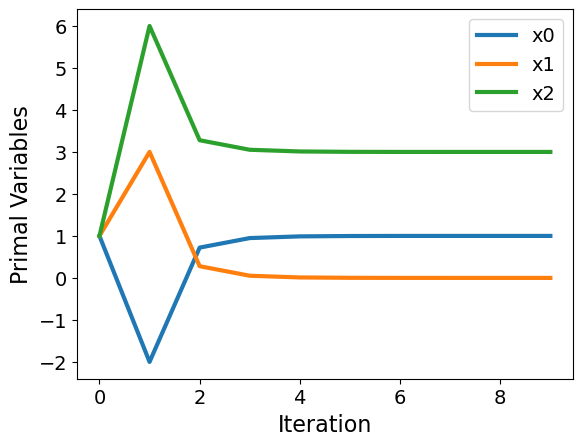

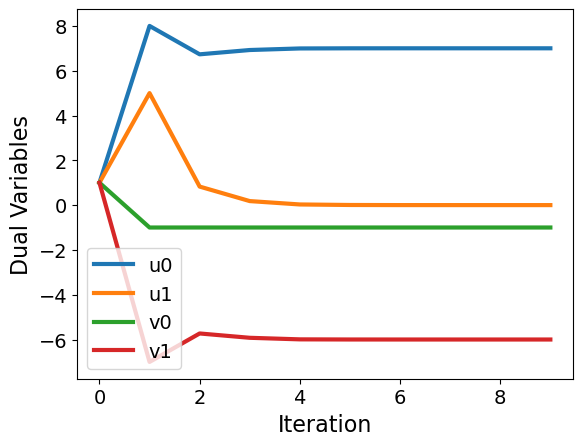

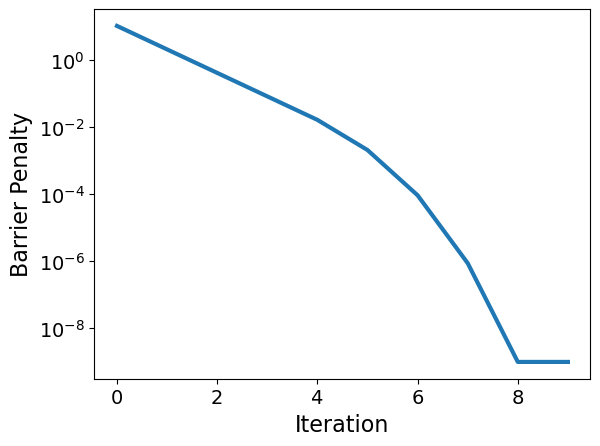

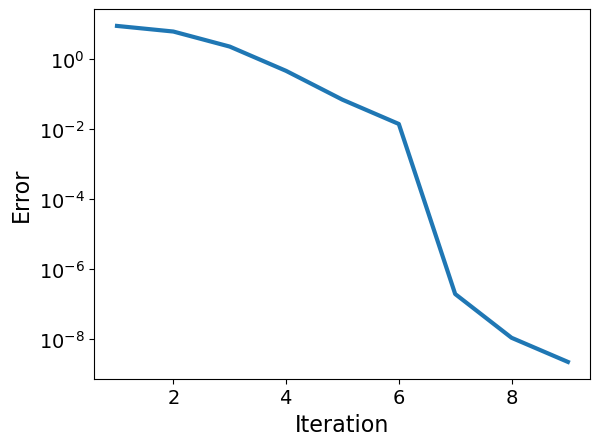

In [9]:
plot_results(x,u,v,mu,E)